In [1]:
# Preamble

## Matplotlib Configuration
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
set_matplotlib_formats('png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## Other Crap
import numpy as np
import scipy as sp
import sympy as sym
from instrumental import Q_, u
import sys
import h5py
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('xtick', labelsize=16) 
#matplotlib.rc('ytick', labelsize=16)
#matplotlib.rcParams.update({'axes.labelsize': 20,'axes.titlesize': 20,'axes.facecolor': '0.9','font.size': 14 })
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,bm}"]
np.set_printoptions(precision=3)
%precision %.3g
import  matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import trapz, cumtrapz
from matplotlib.colors import  ListedColormap, LogNorm, Normalize, BoundaryNorm
import matplotlib.patches as patches
from scipy.optimize import minimize_scalar
from scipy.signal import square
from os import path
from datetime import datetime
import time
fig_dir = '/Users/doddgray/Google Drive/figs'
data_dir = '/Volumes/USB20FD/sweep3_mat'
import sympy as sy
from time import sleep
#import RII_db_tools as rii
#rii.RII_db_dir = '/Users/doddgray/Google Drive/notebooks/RII_db'
import warnings
warnings.filterwarnings('ignore') # set back to 'default' to see warnings again.
#warnings.filterwarnings('default')
colors = ['r','b','g','m','c','k','orange','purple']
from instrumental import instrument, list_instruments, list_visa_instruments
from glob import glob
import os
import pickle
#from instrumental.optics.optical_elements import Mirror, Lens, Space, Interface
#import instrumental.optics.beam_tools as bt
#import instrumental.optics.beam_plotting as bp

# add MATLAB's parula colormap because it's nice

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
plt.register_cmap(cmap=parula)
# define lowest common multiple function for use in Herriott cell modeling
import fractions
def lcm(a,b): return abs(a * b) / fractions.gcd(a,b) if a and b else 0

# functions for twiny plotting (dual unit x axes sharing ticks)
def lm2f_tickfn(X):
    X_lm = X * u.nm
    X_f = (u.speed_of_light / X_lm ).to(u.THz).m
    return ["%3.3f" % z for z in X_f]

def lm2f_tickfn_offset(X,offset):
    X_lm = X * u.nm
    offset_lm = offset * u.nm
    X_f_GHz = (u.speed_of_light / X_lm ).to(u.GHz).m
    offset_f_GHz = (u.speed_of_light / offset_lm ).to(u.GHz).m
    offset_f_THz = (u.speed_of_light / offset_lm ).to(u.THz).m
    X_offset_GHz = X_f_GHz - offset_f_GHz
    return "{:3.3f}".format(offset_f_THz), ["%3.1f" % z for z in X_offset_GHz]

def f2lm_tickfn(X):
    X_f = X * u.THz
    X_lm = (u.speed_of_light / X_f ).to(u.nm).m
    return ["%4.3f" % z for z in X_lm]

def lm2f_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(lm2f_tickfn(ticks))
    ax2.set_xlabel('frequency [THz]')
    return ax2

def lm2f_twiny_offset(ax,offset=None):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    if offset is None:
        offset = np.median(ticks)
    offset_THz_str, tick_str_list = lm2f_tickfn_offset(ticks,offset)
    ax2.set_xticklabels(tick_str_list)
    ax2.set_xlabel('frequency [GHz] offset from ' + offset_THz_str + ' THz')
    return ax2



def f2lm_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(f2lm_tickfn(ticks))
    ax2.set_xlabel('wavelength [nm]')
    return ax2


def ntries(n_tries_max,errors=(Exception, ),default_value=0):
    def decorate(f):
        def new_func(*args, **kwargs):
            n_tries = 0
            success = False
            while (not(success) and (n_tries<n_tries_max)):
                try:
                    out = f(*args,**kwargs)
                    success = True
                except errors:
                    print(f'Warning: function {f.__name__} failed on attempt {n_tries+1} of {n_tries_max+1}')
                    n_tries+=1
                    out = default_value
            return out
        return new_func
    return decorate

## convenience functions for printing variable names and values together
def namestr(obj, namespace=globals()):
    return [name for name in namespace if namespace[name] is obj][0]

def printval(x,w=4,p=1,form='f'):
    x_units = None
    try:
        x_units = str(x.unit)
        x = x.m
    except:
        pass
    if x_units:
        print(namestr(x)+ f': {x:{w}.{p}{form}} ' + x_units)
    else:
        print(namestr(x)+ f': {x:{w}.{p}{form}}')
        

import matplotlib
scope_plot_params = {"lines.color": "white",
                    "patch.edgecolor": "white",
                    "text.color": "black",
                    "axes.facecolor": "black",
                    "axes.edgecolor": "lightgray",
                    "axes.labelcolor": "white",
                    "xtick.color": "white",
                    "ytick.color": "white",
                    "grid.color": "lightgray",
                    "figure.facecolor": "black",
                    "figure.edgecolor": "black",
                    "savefig.facecolor": "black",
                    "savefig.edgecolor": "black",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 1,
                    'axes.linewidth': 2,
                    'axes.grid': True,}

my_default_plot_params = {'savefig.dpi': 75,
                    'figure.autolayout': False,
                    'figure.figsize': (10, 6),
                    'font.size': 16,
                    'lines.linewidth': 2.0,
                    'lines.markersize': 8,
                    'legend.fontsize': 14,
                    'text.usetex': False,
                    'font.family': "serif",
                    'font.serif': "cm",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 2,
                    'axes.linewidth': 1.5,
                    "grid.color": '#707070',
                    'grid.linestyle':':',
                    'grid.linewidth':1,
                    'axes.grid': True,
                    'axes.grid.axis': 'both',
                    'axes.grid.which': 'both',
                    'image.cmap':'parula'}

plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(my_default_plot_params)
%matplotlib inline

C:\Users\Lab\Miniconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Instruments

In [2]:
# import Labjack client functions
github_dir = "C:/Users/Lab/Lab Software/GitHub/experiment_control/temp_monitor"
if github_dir not in sys.path:
    sys.path.append(github_dir)
import labjack_client as ljc
from sample_mount_temp_control import *

In [3]:
# Tektronix AFG
afg_visa_address = 'USB0::0x0699::0x0343::C022130::INSTR'
afg = instrument({'visa_address':afg_visa_address,'module':'funcgenerators.tektronix'})

In [4]:
# Tektronix 2024 oscilloscope
scope = instrument(module='scopes.tektronix', classname='MSO_DPO_4000', visa_address='USB0::0x0699::0x0374::C010960::INSTR')
# define functions to collect traces from oscilloscope

def ntries_tekscope(n_tries_max,errors=(Exception, ),sleep_time=65,default_value=0):
    def decorate(f):
        def new_func(*args, **kwargs):
            n_tries = 0
            success = False
            while (not(success) and (n_tries<n_tries_max)):
                try:
                    out = f(*args,**kwargs)
                    success = True
                except errors:
                    print(f'Warning: function {f.__name__} failed on attempt {n_tries+1} of {n_tries_max+1}')
                    n_tries+=1
                    sleep(sleep_time)
                    out = default_value
            return out
        return new_func
    return decorate

@ntries_tekscope(3)
def collect_scope_trace(channel=1,name='',data_dir='C:/Users/Lab/Google Drive/data/',
                        return_data=True,use_tekscope_str=True,background=None,verbose=True,**kwargs):
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    if use_tekscope_str:
        fname = 'Tektronix_MSO_scope_trace_' + name + '_' + timestamp_str
    else:
        fname = name + '_' + timestamp_str
    mfname = 'metadata_'+fname+'.dat'
    fpath = path.join(data_dir,fname)
    mfpath = path.join(data_dir,mfname)
    t,V = scope.get_data(channel=channel)
    # add a couple other things to kwargs and save as a metadata dict
    metadata = kwargs
    metadata['channel']=channel
    metadata['timestamp']=timestamp_str
    if background:
        V = V-background
        metadata['subtracted_background']=background
    data = np.stack((t.to(u.second).magnitude,V.to(u.volt).magnitude)).T
    if verbose:
        print('saving data to '+fpath)
        print('saving metadata to '+mfname +' in the same dir')
    np.save(fpath,data,fix_imports=True)
    with open(mfpath, 'wb') as f:
        pickle.dump(metadata,f)
    if return_data:
        return t,V
    else:
        del t
        del V
        del data

def load_scope_trace(name='',data_dir='C:/Users/Lab/Google Drive/data/',verbose=False,
                     use_tekscope_str=True,metadata=False,exact_name=False):
    # exact_name=True forces the date to come after the name, avoiding mistakenly loading the wrong trace
    # if two trace files in directory need to be distinguished and one's name contains the other
    if exact_name:
        star_str = '_2*'
    else:
        star_str = '_*'
    if use_tekscope_str:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/Tektronix_MSO_scope_trace_' + name + star_str))
    else:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/'+ name + star_str))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    data = np.load(latest_file)
    t = data[:,0] * u.second
    V = data[:,1] * u.volt
    if metadata:
        mfname = 'metadata_'+latest_file.split('\\')[-1][:-4]+'.dat' # remember to remove '.npy' added to data fname
        mfpath = path.normpath(path.join(data_dir,mfname))
        with open( mfpath, "rb" ) as f:
            mdata = pickle.load(f)
        return t,V,mdata
    else:
        return t,V

In [5]:
# HP8340A 20GHz synthesized sweeper
ss = instrument(module='funcgenerators.hp',classname='HP8340A',visa_address='GPIB0::18::INSTR')

In [6]:
# New Focus 6200 ECDL controller
ecdl = instrument(module='lasers.newfocus', classname='NF6200', visa_address='GPIB0::1::INSTR')

In [7]:
# Ando AQ6331 OSA
osa = instrument('AQ6331')
sleep(0.1)
osa._rsrc.timeout = 10000
@ntries(10)
def collect_ando_spectrum(name='',data_dir='C:/Users/Lab/Google Drive/data/',trace='A'):
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    fname = 'Ando_AQ6331_OSA_spectrum_' + name + '_' + timestamp_str
    fpath = path.join(data_dir,fname)
    osa.set_amplitude_units_PSD()
    sleep(0.3)
    lm,psd = osa.get_spectrum(trace=trace)
    data = np.stack((lm.to(u.nm).m,psd.m)).T
    print('saving to '+fpath)
    np.save(fpath,data,fix_imports=True)
    return lm,psd

def load_ando_spectrum(name='',data_dir='C:/Users/Lab/Google Drive/data/',verbose=False):
    file_list =  glob(path.normpath(data_dir)+path.normpath('/Ando_AQ6331_OSA_spectrum_' + name + '_*'))
    #print(path.normpath(data_dir)+path.normpath('/HP_OSA_spectrum_' + name + '_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    data = np.load(latest_file)
    lm = data[:,0] * u.nm
    psd = data[:,1] * u.watt / u.nm
    return lm,psd

In [8]:
# code to open and use montana in a notebook
import montana as montana
cryo = montana.MontanaCryostat()

# cryo.get_platform_temperature()
# cryo.set_temperature_set_point(Q_(4.8,'kelvin'))
# cryo.start_cool_down()

# Function definitions

In [9]:
# general experiment control functions

def step_ecdl_wavelength(lm_ecdl,wait_time=5*u.second):
    # Pause AFG ch2 scan of ECDL piezo voltage 
    # to allow for stepper to change center wavelength
    afg_ch2_shape = 'ramp'
    afg_ch2_Vmax = 2.51*u.volt
    afg_ch2_Vmin = -2.51*u.volt

    # Turn ECDL scan off via AFG
    afg.set_function(shape='DC',channel=2)
    ecdl.set_wavelength(lm_ecdl)
    sleep(wait_time.to(u.second).m)
    ecdl.track_off()
    # turn ECDL scan back on 
    afg.set_function(shape=afg_ch2_shape,high=afg_ch2_Vmax,low=afg_ch2_Vmin,channel=2)

def reset_scans(f_scan=30*u.Hz):
    # AFG ch1 scan of DFB current via ILX controller
    afg_ch1_Vmax = 5.45*u.volt
    afg_ch1_Vmin = -3.0*u.volt
    # AFG ch2 scan of ECDL piezo voltage (full range 0-100V) with current settings
    afg_ch2_Vmax = 3.51*u.volt
    afg_ch2_Vmin = -2.1*u.volt
    # send values
    afg_ch2_shape = 'ramp'
    afg.set_function(shape=afg_ch2_shape,high=afg_ch2_Vmax,low=afg_ch2_Vmin,channel=2)
    afg.set_frequency(f_scan,channel=2)
    afg_ch1_shape = 'ramp'
    afg.set_function(shape=afg_ch1_shape,high=afg_ch1_Vmax,low=afg_ch1_Vmin,channel=1)
    afg.set_frequency(f_scan,channel=1)

def reset_ch1_scan(f_scan=30*u.Hz):
    # AFG ch1 scan of DFB current via ILX controller
    afg_ch1_Vmax = 5.45*u.volt
    afg_ch1_Vmin = -3.0*u.volt
    # send values
    afg_ch1_shape = 'ramp'
    afg.set_function(shape=afg_ch1_shape,high=afg_ch1_Vmax,low=afg_ch1_Vmin,channel=1)
    afg.set_frequency(f_scan,channel=1)    

def turn_sidebands_off(pl=-40):
    ss.set_power_level(pl)

def turn_sidebands_on(pl=8):
    ss.set_power_level(pl)

def set_sideband_frequency(f_sb=9.5*u.GHz):
    ss.cw_frequency(f_sb)

def set_Vrb_low_range(Vrb):
    if (np.greater_equal(Vrb.to(u.volt).m,0) and np.less_equal(Vrb.to(u.volt).m,5)):
        tia.set_bias_voltage(-1*Vrb)
    else:
        raise Exception('Invalid input to set_Vrb_low_range: {}'.format(Vrb))

        
def set_Vrb_high_range(Vrb):
    xhr_write(Vrb)
    sleep(1)

def set_V_VCA(V_VCA,lj_pump_VCA_ctl_channel=1):
    if (np.greater_equal(V_VCA.to(u.volt).m,0) and np.less_equal(V_VCA.to(u.volt).m,5)):
        ljc.write(V_VCA.to(u.volt).m,lj_pump_VCA_ctl_channel)
    else:
        raise Exception('Invalid input to set_V_VCA: {}'.format(V_VCA))

def bg_measurements(wait_time=2*u.second,set_up_measurements=True):
    P_trans_ch = 1
    P_ref_ch = 2
    I_TPA_ch = 4
    P_trans_bg_meas_num = 1
    P_ref_bg_meas_num = 2
    I_TPA_bg_meas_num = 4
    if set_up_measurements:
        scope.set_measurement_params(P_trans_bg_meas_num,'mean',P_trans_ch)
        sleep(0.1)
        scope.set_measurement_params(P_ref_bg_meas_num,'mean',P_ref_ch)
        sleep(0.1)
        scope.set_measurement_params(I_TPA_bg_meas_num,'mean',I_TPA_ch)
        sleep(0.1)
    sleep(wait_time.to(u.second).m)
    V_bg_P_trans = scope.read_measurement_value(P_trans_bg_meas_num)
    sleep(0.1)                    
    V_bg_P_ref = scope.read_measurement_value(P_ref_bg_meas_num)
    sleep(0.1)
    V_bg_I_TPA = scope.read_measurement_value(I_TPA_bg_meas_num)
    return(V_bg_P_trans,V_bg_P_ref,V_bg_I_TPA)



In [10]:
# sample temperature sweep functions for back room setup
        
# define functions to take spectra at several temperatures

# note that for now, the sample temp control functions don't use unitful temperature quantities
# just floats in degC

# function to set temperature and wait for it to settle
def set_temp_and_wait(T_set,settling_threshold=0.015,t_settle_max=15*u.minute,n_samples=10,dt_sample=10*u.second,verbose=False):
    print(f'setting sample temp to {T_set:2.4f}C...')
    set_set_temp(T_set)
    t0 = time.time()
    samples = np.zeros(10)
    n_samples_taken = 0
    sample_deviation = 100 # random high number, shouldn't matter
    while ( ( ( (time.time()-t0)<t_settle_max.to(u.second).m ) and (n_samples_taken<(n_samples-1)) ) or ( sample_deviation>settling_threshold ) ):
        sleep(dt_sample.to(u.second).m)
        new_sample = get_meas_temp()
        if n_samples_taken<n_samples:
            samples[n_samples_taken] = new_sample
        else:
            samples[:-1] = samples[1:]
            samples[-1] = new_sample
            sample_deviation = samples.max() - samples.min()
        n_samples_taken+=1
        if verbose:
            print(f'n_samples_taken: {n_samples_taken}')
            print(f'time elapsed: {(time.time()-t0):4.1f} sec')
            print(f'samples: {samples} C')
            print(f'sample_deviation: {sample_deviation:3.4f} C')
            print('#########################')
    new_temp = samples.mean()
    time_spent = (time.time()-t0)*u.second
    if time_spent.m > 60.0:
        time_spent = time_spent.to(u.minute)
        print(f'settled at {new_temp:2.3f}C after {time_spent.m:2.2f} minutes')
    else:
        print(f'settled at {new_temp:2.3f}C after {time_spent.m:2.1f} seconds')
    return new_temp


def collect_sample_temp_sweep(set_name,Tset_list,f_sb=10*u.GHz,V_VCA=0.5*u.volt,wait_time=2*u.second,
                              data_dir='C:/Users/Lab/agilent_scope_data',**kwargs):
    set_dir = path.normpath(path.join(data_dir,set_name))
    if not os.path.exists(set_dir):
        os.makedirs(set_dir)
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    sweep_data = {'Tset':Tset_list,'f_sb':f_sb}
    sweep_fname = 'sweep_data_' + timestamp_str +'.dat'
    sweep_fpath = path.join(set_dir,sweep_fname)
    with open(sweep_fpath, 'wb') as f:
        pickle.dump(sweep_data,f)
    # start data collection
    set_sideband_frequency(f_sb)
    sleep(0.5)
    turn_sidebands_on()
    for Tind,TT in enumerate(Tset_list):
        T_meas = set_temp_and_wait(TT,**kwargs)
        T_dir = path.normpath(path.join(set_dir,f'{TT:2.3}C'))
        if not os.path.exists(T_dir):
            os.makedirs(T_dir)
        ## collect background voltages for power and TPA current measurements
        set_V_VCA(0*u.volt)
        sleep(wait_time.to(u.second).m)
        if Tind==0:
            V_bg_P_trans,V_bg_P_ref,V_bg_I_TPA = bg_measurements(set_up_measurements=True)
        else:
            V_bg_P_trans,V_bg_P_ref,V_bg_I_TPA = bg_measurements(set_up_measurements=False)
        set_V_VCA(V_VCA)
        sleep(wait_time.to(u.second).m)
        ## collect Tek scope traces with sidebands on
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans',data_dir=T_dir,return_data=False,use_tekscope_str=False,background=V_bg_P_trans,T_meas=T_meas)
        sleep(0.5)
        collect_scope_trace(channel=2,name=f'P_ref',data_dir=T_dir,return_data=False,use_tekscope_str=False,background=V_bg_P_ref,T_meas=T_meas)
        sleep(0.5)
        collect_scope_trace(channel=3,name=f'Vmod',data_dir=T_dir,return_data=False,use_tekscope_str=False,T_meas=T_meas)
        sleep(0.5)
        scope.run_acquire()
        
def load_sample_temp_sweep(set_name,data_dir='C:/Users/Lab/agilent_scope_data'):
    set_dir = path.normpath(path.join(data_dir,set_name))
    sweep_file_list =  glob(path.normpath(set_dir)+path.normpath('/sweep_data_*'))
    latest_sweep_file = max(sweep_file_list,key=path.getctime)
    with open(latest_sweep_file, "rb" ) as f:
        sweep_data = pickle.load(f)
    T_set = sweep_data['Tset']
    # check length of traces
    check_dir = path.normpath(path.join(set_dir,f'{T_set[0]:2.3}C'))
    t,V_check,metadata_check = load_scope_trace('P_trans',
                                                      data_dir=check_dir,
                                                      use_tekscope_str=False,
                                                      metadata=True)
    L = len(t)
    V_P_trans = np.empty((L,len(T_set)))*u.volt
    V_P_ref = np.empty((L,len(T_set)))*u.volt
    V_mod = np.empty((L,len(T_set)))*u.volt
    T_meas = np.empty(len(T_set))
    f_sb = np.empty(len(T_set))*u.GHz

    for Tind,TT in enumerate(T_set):
        T_dir = path.normpath(path.join(set_dir,f'{TT:2.3}C'))
        t_temp,V_P_trans_temp,metadata = load_scope_trace('P_trans',data_dir=T_dir,use_tekscope_str=False,metadata=True)
        t_temp,V_P_ref_temp,metadata = load_scope_trace('P_ref',data_dir=T_dir,use_tekscope_str=False,metadata=True)
        t_temp,V_mod_temp,metadata = load_scope_trace('Vmod',data_dir=T_dir,use_tekscope_str=False,metadata=True)
        #f_sb[Tind] = metadata['f_sb']
        T_meas[Tind] = metadata['T_meas']
        V_P_trans[:,Tind] = V_P_trans_temp
        V_P_ref[:,Tind] = V_P_ref_temp
        V_mod[:,Tind] = V_mod_temp

    data = sweep_data
    data['t'] =t
    data['V_P_trans'] = V_P_trans
    data['V_P_ref'] = V_P_ref
    data['V_mod'] = V_mod
    data['T_meas'] = T_meas
    #data['f_sb'] = f_sb
    return data
 
    
def process_sample_temp_sweep(data,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess):
    T_set = data['Tset']
    t = data['t'].to(u.ms)
    t_lim = t[(t>t0)*(t<t1)]
    V_P_trans = data['V_P_trans']
    V_P_ref = data['V_P_ref']
    V_mod = data['V_mod']
    T_meas = data['T_meas']
    f_sb = data['f_sb']
    fit_results = []
    for Tind,TT in enumerate(T_set): 
        V_P_trans_lim = V_P_trans[:,Tind][(t>t0)*(t<t1)]
        V_P_trans_lim_min = V_P_trans_lim.min()
        V_P_trans_lim_min_ind = np.argmin(np.abs(V_P_trans_lim-V_P_trans_lim_min))
        t_V_P_min = t_lim[V_P_trans_lim_min_ind]
        tt0 = t_V_P_min - 0.26*u.ms
        tt1 = t_V_P_min + 0.26*u.ms
        tt0_norm = t_V_P_min + 0.21*u.ms
        tt1_norm = t_V_P_min + 0.25*u.ms
        tt0_offset = t_V_P_min - 0.256*u.ms
        tt1_offset = t_V_P_min - 0.251*u.ms
        fit_results.append(triple_double_lorentzian_fit(t.to(u.ms),
                                                       V_P_trans[:,Tind],
                                                       V_P_ref[:,Tind],
                                                       V_mod[:,Tind],
                                                       f_sb,
                                                       tt0,
                                                       tt1,
                                                       tt0_norm,
                                                       tt1_norm,
                                                       tt0_offset,
                                                       tt1_offset,
                                                       FWHM_guess,
                                                       dt_guess,
                                                       dt_sb_guess,
                                                       verbose=False))
       
    data['fit_results'] = fit_results
    

In [11]:
# sample temperature sweep functions for back room setup
        
# define functions to take spectra at several temperatures

# note that for now, the sample temp control functions don't use unitful temperature quantities
# just floats in degC

# function to set temperature and wait for it to settle
def set_cryo_temp_and_wait(T_set,settling_threshold=0.05*u.degK,t_settle_max=20*u.minute,n_samples=10,dt_sample=10*u.second,verbose=False):
    print(f'setting sample temp to {T_set.m:2.4f}K...')
    cryo.set_temperature_set_point(T_set)
    t0 = time.time()
    samples = np.zeros(10)*u.degK
    n_samples_taken = 0
    sample_deviation = 100*u.degK # random high number, shouldn't matter
    while ( ( ( (time.time()-t0)<t_settle_max.to(u.second).m ) and (n_samples_taken<(n_samples-1)) ) or ( sample_deviation>settling_threshold ) ):
        sleep(dt_sample.to(u.second).m)
        new_sample = cryo.get_platform_temperature()
        if n_samples_taken<n_samples:
            samples[n_samples_taken] = new_sample
        else:
            samples[:-1] = samples[1:]
            samples[-1] = new_sample
            sample_deviation = samples.max() - samples.min()
        n_samples_taken+=1
        if verbose:
            print(f'n_samples_taken: {n_samples_taken}')
            print(f'time elapsed: {(time.time()-t0):4.1f} sec')
            print(f'samples: {samples} C')
            print(f'sample_deviation: {sample_deviation:3.4f} C')
            print('#########################')
    new_temp = samples.mean()
    time_spent = (time.time()-t0)*u.second
    if time_spent.m > 60.0:
        time_spent = time_spent.to(u.minute)
        print(f'settled at {new_temp:2.3f}C after {time_spent.m:2.2f} minutes')
    else:
        print(f'settled at {new_temp:2.3f}C after {time_spent.m:2.1f} seconds')
    return new_temp


def collect_cryo_sample_temp_sweep(set_name,Tset_list,f_sb=3*u.GHz,V_VCA=3.0*u.volt,wait_time=2*u.second,
                              data_dir='C:/Users/Lab/agilent_scope_data',**kwargs):
    set_dir = path.normpath(path.join(data_dir,set_name))
    if not os.path.exists(set_dir):
        os.makedirs(set_dir)
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    T_meas = np.zeros(len(Tset_list))*u.degK
    sweep_data = {'Tset':Tset_list,'f_sb':f_sb,'Tmeas':T_meas}
    sweep_fname = 'cryo_temp_sweep_data_' + timestamp_str +'.dat'
    sweep_fpath = path.join(set_dir,sweep_fname)
    with open(sweep_fpath, 'wb') as f:
        pickle.dump(sweep_data,f)
    # start data collection
    set_V_VCA(V_VCA)
    sleep(0.5)
    #set_sideband_frequency(f_sb) # sythesized sweeper comms broken all the sudden. just doing it by hand now.
    sleep(0.5)
    #turn_sidebands_on() # sythesized sweeper comms broken all the sudden. just doing it by hand now.
    # collect base temperature spectrum ('setting' the temperature seems to put the cryostat in a lower-cooling-power mode
    # causing a sharp sudden increase in temperature even if you just set the temperature to the base temperature
    T_base = cryo.get_platform_temperature()
    sweep_data = {'Tset':Tset_list,'f_sb':f_sb,'Tmeas':T_meas,'Tbase':T_base}
    with open(sweep_fpath, 'wb') as f:
            pickle.dump(sweep_data,f)
    sleep(wait_time.to(u.second).m)
    ## collect Tek scope traces with sidebands on
    scope.stop_acquire()
    sleep(0.5)
    collect_scope_trace(channel=1,name=f'P_trans_base',data_dir=set_dir,return_data=False,use_tekscope_str=False)
    sleep(0.5)
    scope.run_acquire()
    sleep(wait_time.to(u.second).m)
    # now sweep the temperature
    for Tind,TT in enumerate(Tset_list):
        set_cryo_temp_and_wait(TT,**kwargs)
        T_meas[Tind] = cryo.get_platform_temperature() 
        sweep_data = {'Tset':Tset_list,'f_sb':f_sb,'Tbase':T_base,'Tmeas':T_meas}
        with open(sweep_fpath, 'wb') as f:
            pickle.dump(sweep_data,f)
        sleep(wait_time.to(u.second).m)
        ## collect Tek scope traces with sidebands on
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans_{TT.m:4.1f}K',data_dir=set_dir,return_data=False,use_tekscope_str=False,T_meas=T_meas)
        sleep(0.5)
        scope.run_acquire()
        sleep(wait_time.to(u.second).m)
        
        
def load_cryo_sample_temp_sweep(set_name,data_dir='C:/Users/Lab/agilent_scope_data'):
    set_dir = path.normpath(path.join(data_dir,set_name))
    sweep_file_list =  glob(path.normpath(set_dir)+path.normpath('/cryo_temp_sweep_data_*'))
    latest_sweep_file = max(sweep_file_list,key=path.getctime)
    with open(latest_sweep_file, "rb" ) as f:
        sweep_data = pickle.load(f)
    T_set = sweep_data['Tset']
    # check length of traces
    check_dir = set_dir#path.normpath(path.join(set_dir,f'{T_set[0]:2.3}C'))
    t,V_check = load_scope_trace('P_trans',
                                  data_dir=check_dir,
                                  use_tekscope_str=False)
    L = len(t)
    V_P_trans = np.empty((L,len(T_set)))*u.volt
    V_P_ref = np.empty((L,len(T_set)))*u.volt
    V_mod = np.empty((L,len(T_set)))*u.volt
    T_meas = np.empty(len(T_set))
    #f_sb = np.empty(len(T_set))*u.GHz

    for Tind,TT in enumerate(T_set):
        t_temp,V_P_trans_temp = load_scope_trace(f'P_trans_{TT.m:4.1f}K',data_dir=set_dir,use_tekscope_str=False)
        V_P_trans[:,Tind] = V_P_trans_temp

    data = sweep_data
    data['t'] =t
    data['V_P_trans'] = V_P_trans
    return data
 
    
def process_sample_temp_sweep(data,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess):
    T_set = data['Tset']
    t = data['t'].to(u.ms)
    t_lim = t[(t>t0)*(t<t1)]
    V_P_trans = data['V_P_trans']
    V_P_ref = data['V_P_ref']
    V_mod = data['V_mod']
    T_meas = data['T_meas']
    f_sb = data['f_sb']
    fit_results = []
    for Tind,TT in enumerate(T_set): 
        V_P_trans_lim = V_P_trans[:,Tind][(t>t0)*(t<t1)]
        V_P_trans_lim_min = V_P_trans_lim.min()
        V_P_trans_lim_min_ind = np.argmin(np.abs(V_P_trans_lim-V_P_trans_lim_min))
        t_V_P_min = t_lim[V_P_trans_lim_min_ind]
        tt0 = t_V_P_min - 0.26*u.ms
        tt1 = t_V_P_min + 0.26*u.ms
        tt0_norm = t_V_P_min + 0.21*u.ms
        tt1_norm = t_V_P_min + 0.25*u.ms
        tt0_offset = t_V_P_min - 0.256*u.ms
        tt1_offset = t_V_P_min - 0.251*u.ms
        fit_results.append(triple_double_lorentzian_fit(t.to(u.ms),
                                                       V_P_trans[:,Tind],
                                                       V_P_ref[:,Tind],
                                                       V_mod[:,Tind],
                                                       f_sb,
                                                       tt0,
                                                       tt1,
                                                       tt0_norm,
                                                       tt1_norm,
                                                       tt0_offset,
                                                       tt1_offset,
                                                       FWHM_guess,
                                                       dt_guess,
                                                       dt_sb_guess,
                                                       verbose=False))
       
    data['fit_results'] = fit_results
    

In [12]:
# sweep pump wavelength over thermal bistability with fixed probe wavelength
# to measure thermal relaxation time

# version for cryostat experiment

# pump (DFB+EDFA) near 1548nm, swept ~200GHz
# probe (ECDL+EDFA) fixed near 1533nm

# pump tuned blue-to-red, thermally detunes all modes while on upper branch of thermo-optic bistability

# nearest longitudinal mode blue of probe passes probe frequency during b2r pump sweep

# assuming all modes are thermally detuning by roughly the same amount, we know the amount of further detuning 
# that occurs to both pump and probe modes before pump falls off the high branch of thermo-optic bistability

# shortly after the sudden drop in intracavity power, the probe mode passes the probe laser frequency
# while cooling back to its room-temperature frequency. This way, we measure the thermal relaxation time

def set_afg_DC_val(V_DC,ch=2):
    afg.set_function_shape(shape='DC',channel=ch)
    afg.set_offset(V_DC,channel=ch)

def set_ch4_trigger():
    # set trigger to ch3
    scope.write('trigger:A:edge:source ch3')
    sleep(2)
    V_I_max = _get_V_max()
    sleep(0.5)
    scope.write(f'trigger:A:level:ch4 {V_I_max.m/2.0:4.3e}')
    sleep(0.5)
    # set trigger to ch4
    scope.write('trigger:A:edge:source ch4')
    sleep(0.5)

def set_scope_hor_scale(scale):
    scope.write(f'hor:main:scale {scale.to(u.second).m:3.1e}')
    sleep(0.5)

def detect_pump_tuning_range(lm,psd,lm_min=1540*u.nm,psd_min=-25/u.nm,**kwargs):
    mask = (psd>psd_min)*(lm>lm_min)
    lm_pump_min = lm[mask].min()
    lm_pump_max = lm[mask].max()
    lm_pump_range = lm_pump_max - lm_pump_min
    f_pump_range = lm_pump_min.to(u.GHz,'sp') - lm_pump_max.to(u.GHz,'sp')
    return f_pump_range

def collect_cryo_thermal_relaxation_piezo_sweep(sweep_name,V_list,tia_sensitivity,
                                                t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us,
                                                wait_time=2*u.second,data_dir='C:/Users/Lab/agilent_scope_data',**kwargs):
    # create/enter sweep directory
    set_dir = path.normpath(path.join(data_dir,set_name))
    if not os.path.exists(set_dir):
        os.makedirs(set_dir)
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    # collect OSA spectrum to record pump tuning range and probe frequency, then set range for measuring probe wavelength
    osa.set_center_wavelength(lm_center_pump_spec)
    sleep(0.3)
    osa.set_wavelength_span(lm_span_pump_spec)
    sleep(10)
    lm_pump_psd, pump_psd = collect_ando_spectrum('tuning_spectrum',data_dir=set_dir)
    sleep(0.3)
    osa.set_center_wavelength(lm_center_probe_spec)
    sleep(0.3)
    osa.set_wavelength_span(lm_span_probe_spec)
    f_pump_range = detect_pump_tuning_range(lm_pump_psd,pump_psd,**kwargs)
    # query I_TPA transimpedance gain to calibrate I_TPA current measurement
    #tia_sensitivity = tia.sensitivity
    # query afg for pump sweep frequency and set scope horizontal scale accordingly
    f_pump_sweep = float(afg.get_frequency(channel=1).split()[0])*u.Hz
    set_scope_hor_scale((1*u.ms)/(f_pump_sweep/(100*u.Hz)).to(u.dimensionless).m)
    # set up measurement of ch4's max value so that the trigger can be reset to half the max value 
    # each time the pump power is changed
    scope.set_measurement_params(1,'maximum',4)
    sleep(0.5)
    # save sweep_data file
    sweep_data = {'V_list':V_list,
                  'f_pump_range':f_pump_range,
                  'tia_sensitivity':tia_sensitivity,
                  'f_pump_sweep':f_pump_sweep,
                  't_delay':t_delay}
    sweep_fname = 'sweep_data_' + timestamp_str +'.dat'
    sweep_fpath = path.join(set_dir,sweep_fname)
    with open(sweep_fpath, 'wb') as f:
        pickle.dump(sweep_data,f)
    lm_probe_meas_list = np.zeros(len(V_list))*u.nm
    # start data collection
    for Vind, VV in enumerate(V_list):
        #ecdl.set_wavelength(ll)
        #ecdl.set_piezo_voltage(VV)
        set_afg_DC_val(VV,ch=2)
        #sleep(wait_time.to(u.second).m)
        #set_ch4_trigger()
        sleep(wait_time.to(u.second).m)
        lm_dir = path.normpath(path.join(set_dir,f'{VV.m:3.1f}V'))
        if not os.path.exists(lm_dir):
            os.makedirs(lm_dir)
        # collect probe spectrum, update measured probe wavelength array, resave sweep_data with updated datapoint
        lm_probe_psd, probe_psd = collect_ando_spectrum('probe_spectrum',data_dir=lm_dir)
        sleep(0.3)
        lm_probe_meas = lm_probe_psd.max()
        lm_probe_meas_list[Vind]=lm_probe_meas
        sweep_data['lm_probe_meas'] = lm_probe_meas_list
        with open(sweep_fpath, 'wb') as f:
            pickle.dump(sweep_data,f)
        ## collect Tek scope traces
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans_probe',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=2,name=f'P_trans_pump',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=4,name=f'I_TPA',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=3,name=f'Vmod',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        set_scope_hor_scale(t_scale_zoom)
        sleep(0.5)
        scope.write(f'horizontal:delay:time {t_delay.to(u.second).m:4.2e}')
        sleep(0.5)
        scope.run_acquire()
        sleep(wait_time.to(u.second).m)
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans_probe_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=2,name=f'P_trans_pump_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=4,name=f'I_TPA_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        set_scope_hor_scale((1*u.ms)/(f_pump_sweep/(100*u.Hz)).to(u.dimensionless).m)
        sleep(0.5)
        scope.write(f'horizontal:delay:time 0.0')
        sleep(0.5)
        scope.run_acquire()
        

def collect_cryo_thermal_relaxation_sweep(set_name,lm_list,tia_sensitivity,
                                        t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
                                        lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                        lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us,
                                        wait_time=2*u.second,data_dir='C:/Users/Lab/agilent_scope_data',**kwargs):
    # create/enter sweep directory
    set_dir = path.normpath(path.join(data_dir,set_name))
    if not os.path.exists(set_dir):
        os.makedirs(set_dir)
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    # collect OSA spectrum to record pump tuning range and probe frequency, then set range for measuring probe wavelength
    osa.set_center_wavelength(lm_center_pump_spec)
    sleep(0.3)
    osa.set_wavelength_span(lm_span_pump_spec)
    sleep(10)
    lm_pump_psd, pump_psd = collect_ando_spectrum('tuning_spectrum',data_dir=set_dir)
    sleep(0.3)
    osa.set_center_wavelength(lm_center_probe_spec)
    sleep(0.3)
    osa.set_wavelength_span(lm_span_probe_spec)
    f_pump_range = detect_pump_tuning_range(lm_pump_psd,pump_psd,**kwargs)
    # query I_TPA transimpedance gain to calibrate I_TPA current measurement
    #tia_sensitivity = tia.sensitivity
    # query afg for pump sweep frequency and set scope horizontal scale accordingly
    f_pump_sweep = float(afg.get_frequency(channel=1).split()[0])*u.Hz
    set_scope_hor_scale((1*u.ms)/(f_pump_sweep/(100*u.Hz)).to(u.dimensionless).m)
    # set up measurement of ch4's max value so that the trigger can be reset to half the max value 
    # each time the pump power is changed
    scope.set_measurement_params(1,'maximum',4)
    sleep(0.5)
    # save sweep_data file
    sweep_data = {'lm_list':lm_list,
                  'f_pump_range':f_pump_range,
                  'tia_sensitivity':tia_sensitivity,
                  'f_pump_sweep':f_pump_sweep,
                  't_delay':t_delay,
                  'T_platform':cryo.get_platform_temperature()}
    sweep_fname = 'sweep_data_' + timestamp_str +'.dat'
    sweep_fpath = path.join(set_dir,sweep_fname)
    with open(sweep_fpath, 'wb') as f:
        pickle.dump(sweep_data,f)
    lm_probe_meas_list = np.zeros(len(lm_list))*u.nm
    # start data collection
    for lind, ll in enumerate(lm_list):
        ecdl.set_wavelength(ll)
        sleep(5)
        ecdl.track_off()
        #step_ecdl_wavelength(ll)
        sleep(wait_time.to(u.second).m)
        #set_ch4_trigger()
        sleep(wait_time.to(u.second).m)
        lm_dir = path.normpath(path.join(set_dir,f'{ll.m:6.2f}nm'))
        if not os.path.exists(lm_dir):
            os.makedirs(lm_dir)
        # collect probe spectrum, update measured probe wavelength array, resave sweep_data with updated datapoint
        lm_probe_psd, probe_psd = collect_ando_spectrum('probe_spectrum',data_dir=lm_dir)
        sleep(0.3)
        lm_probe_meas = lm_probe_psd.max()
        lm_probe_meas_list[lind]=lm_probe_meas
        sweep_data['lm_probe_meas'] = lm_probe_meas_list
        with open(sweep_fpath, 'wb') as f:
            pickle.dump(sweep_data,f)
        ## collect Tek scope traces
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans_probe',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=2,name=f'P_trans_pump',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=4,name=f'I_TPA',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=3,name=f'Vmod',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        set_scope_hor_scale(t_scale_zoom)
        sleep(0.5)
        scope.write(f'horizontal:delay:time {t_delay.to(u.second).m:4.2e}')
        sleep(0.5)
        scope.run_acquire()
        sleep(wait_time.to(u.second).m)
        scope.stop_acquire()
        sleep(0.5)
        collect_scope_trace(channel=1,name=f'P_trans_probe_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=2,name=f'P_trans_pump_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        collect_scope_trace(channel=4,name=f'I_TPA_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
        sleep(0.5)
        set_scope_hor_scale((1*u.ms)/(f_pump_sweep/(100*u.Hz)).to(u.dimensionless).m)
        sleep(0.5)
        scope.write(f'horizontal:delay:time 0.0')
        sleep(0.5)
        scope.run_acquire()
        
# # the ECDL appears to be struggling to continue lasing when sent a command piezo voltage
# # so i'll just grab the points by hand using this function
# def collect_cryo_thermal_relaxation_piezo_datapoint(sweep_name,V_list,tia_sensitivity,
#                                                 t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
#                                                 lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
#                                                 lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us,
#                                                 wait_time=2*u.second,data_dir='C:/Users/Lab/agilent_scope_data',**kwargs
#         VV = ecdl.get_piezo_voltage(VV)
#         #sleep(wait_time.to(u.second).m)
#         #set_ch4_trigger()
#         sleep(wait_time.to(u.second).m)
#         lm_dir = path.normpath(path.join(set_dir,f'{VV.m:3.1f}V'))
#         if not os.path.exists(lm_dir):
#             os.makedirs(lm_dir)
#         # collect probe spectrum, update measured probe wavelength array, resave sweep_data with updated datapoint
#         lm_probe_psd, probe_psd = collect_ando_spectrum('probe_spectrum',data_dir=lm_dir)
#         sleep(0.3)
#         lm_probe_meas = lm_probe_psd.max()
#         lm_probe_meas_list[Vind]=lm_probe_meas
#         sweep_data['lm_probe_meas'] = lm_probe_meas_list
#         with open(sweep_fpath, 'wb') as f:
#             pickle.dump(sweep_data,f)
#         ## collect Tek scope traces
#         scope.stop_acquire()
#         sleep(0.5)
#         collect_scope_trace(channel=1,name=f'P_trans_probe',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         collect_scope_trace(channel=2,name=f'P_trans_pump',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         collect_scope_trace(channel=4,name=f'I_TPA',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         collect_scope_trace(channel=3,name=f'Vmod',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         set_scope_hor_scale(t_scale_zoom)
#         sleep(0.5)
#         scope.write(f'horizontal:delay:time {t_delay.to(u.second).m:4.2e}')
#         sleep(0.5)
#         scope.run_acquire()
#         sleep(wait_time.to(u.second).m)
#         scope.stop_acquire()
#         sleep(0.5)
#         collect_scope_trace(channel=1,name=f'P_trans_probe_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         collect_scope_trace(channel=2,name=f'P_trans_pump_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         collect_scope_trace(channel=4,name=f'I_TPA_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False,lm_probe_meas=lm_probe_meas)
#         sleep(0.5)
#         set_scope_hor_scale((1*u.ms)/(f_pump_sweep/(100*u.Hz)).to(u.dimensionless).m)
#         sleep(0.5)
#         scope.write(f'horizontal:delay:time 0.0')
#         sleep(0.5)
#         scope.run_acquire()
        
def load_sweep_data(set_dir,verbose=False):
    file_list =  glob(path.normpath(set_dir)+path.normpath('/sweep_data_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print_statusline('Loading sweep data file: ' + path.basename(path.normpath(latest_file)))
    return np.load(latest_file)
        
def process_thermal_relaxation_sweep(sweep_name,data_dir='C:/Users/Lab/agilent_scope_data',**kwargs):
    set_dir = path.normpath(path.join(data_dir,set_name))
    sweep_data = load_sweep_data(set_dir)
    dataset = sweep_data
    # for lind, ll in enumerate(sweep_data['lm_set_list']):
    lind, ll = 0, sweep_data['lm_set_list'][0]
    lm_dir = path.normpath(path.join(set_dir,f'{ll.m:6.2f}nm'))
    t,P_trans = load_scope_trace(name=f'P_trans',data_dir=lm_dir,return_data=False,use_tekscope_str=False)
    t,I_TPA = load_scope_trace(name=f'I_TPA',data_dir=lm_dir,return_data=False,use_tekscope_str=False)
    t,V_mod = load_scope_trace(name=f'Vmod',data_dir=lm_dir,return_data=False,use_tekscope_str=False)
    t_zoom,P_trans_zoom = load_scope_trace(name=f'P_trans_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False)
    t_zoom,I_TPA_zoom = load_scope_trace(name=f'I_TPA_zoom',data_dir=lm_dir,return_data=False,use_tekscope_str=False)
    
    
    
    return dataset


# Data Collection


In [31]:
# set_name='test1'
# Tset_list = np.arange(5,8.5,0.5)*u.degK
# collect_cryo_sample_temp_sweep(set_name,Tset_list)

setting sample temp to 5.0000K...
Message from Montana:  OK, Temperature Set Point = 5.00
settled at 5.328 kelvinC after 3.51 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\test1\P_trans_2018_08_26_17_41_32
saving metadata to metadata_P_trans_2018_08_26_17_41_32.dat in the same dir
setting sample temp to 5.5000K...
Message from Montana:  OK, Temperature Set Point = 5.50
settled at 5.501 kelvinC after 3.01 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\test1\P_trans_2018_08_26_17_44_40
saving metadata to metadata_P_trans_2018_08_26_17_44_40.dat in the same dir
setting sample temp to 6.0000K...
Message from Montana:  OK, Temperature Set Point = 6.00
settled at 6.000 kelvinC after 4.85 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\test1\P_trans_2018_08_26_17_49_39
saving metadata to metadata_P_trans_2018_08_26_17_49_39.dat in the same dir
setting sample temp to 6.5000K...
Message from Montana:  OK, Temperature Set Point = 6.50
settled at 6.500

In [44]:
# examine data from 'test1'
set_name='test1'
data_test1 = load_cryo_sample_temp_sweep(set_name)

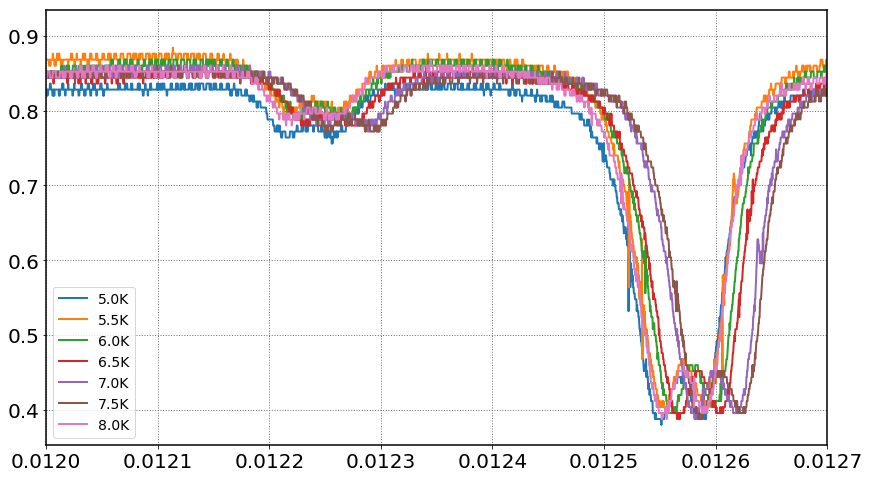

In [53]:
# data_test1.keys()
# :dict_keys(['Tset', 'f_sb', 'Tmeas', 't', 'V_P_trans'])
data_skip=1
d = data_test1
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

for Tind,TT in enumerate(d['Tset']):
    ax.plot(d['t'][::data_skip],d['V_P_trans'][::data_skip,Tind],label=f'{TT.m:2.1f}K')

ax.set_xlim([0.012,0.0127])
ax.legend()

In [61]:
set_name='cryo_Tsweep0'
Tset_list = np.arange(6,42,2)*u.degK
collect_cryo_sample_temp_sweep(set_name,Tset_list)

setting sample temp to 6.0000K...
Message from Montana:  OK, Temperature Set Point = 6.00
settled at 5.993 kelvinC after 2.67 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep0\P_trans_2018_08_26_19_35_11
saving metadata to metadata_P_trans_2018_08_26_19_35_11.dat in the same dir
setting sample temp to 8.0000K...
Message from Montana:  OK, Temperature Set Point = 8.00
settled at 7.962 kelvinC after 3.68 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep0\P_trans_2018_08_26_19_38_59
saving metadata to metadata_P_trans_2018_08_26_19_38_59.dat in the same dir
setting sample temp to 10.0000K...
Message from Montana:  OK, Temperature Set Point = 10.00
settled at 9.905 kelvinC after 5.35 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep0\P_trans_2018_08_26_19_44_27
saving metadata to metadata_P_trans_2018_08_26_19_44_27.dat in the same dir
setting sample temp to 12.0000K...
Message from Montana:  OK, Temperature Set Point

In [72]:
set_name='cryo_Tsweep0'
ds_Tsweep0 = load_cryo_sample_temp_sweep(set_name)

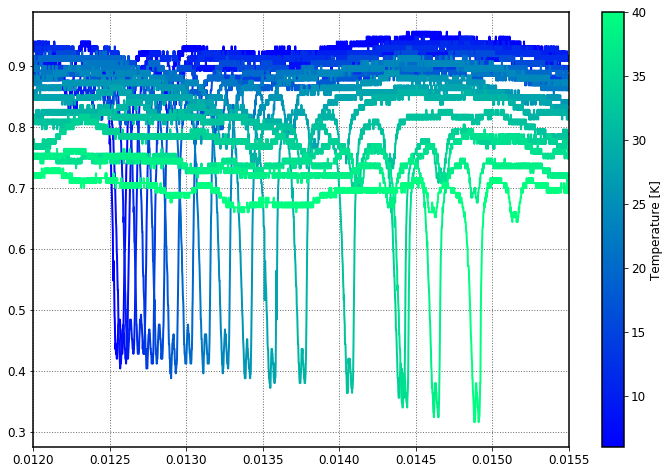

In [79]:
# plot data and fits for all temperature points
data_skip = 5
d = ds_Tsweep0

temp_plot_params = {'savefig.dpi': 75,
                    'figure.autolayout': False,
                    'figure.figsize': (10, 6),
                    'font.size': 12,
                    'lines.linewidth': 2.0,
                    'lines.markersize': 8,
                    'legend.fontsize': 14,
                    'text.usetex': False,
                    'font.family': "serif",
                    'font.serif': "cm",
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'axes.labelsize': 12,
                    'axes.titlesize': 12,
                    'font.size': 12,
                    'lines.linewidth': 2,
                    'axes.linewidth': 1.5,
                    "grid.color": '#707070',
                    'grid.linestyle':':',
                    'grid.linewidth':1,
                    'axes.grid': True,
                    'axes.grid.axis': 'both',
                    'axes.grid.which': 'both',
                    'image.cmap':'parula'}

with plt.rc_context(temp_plot_params):
    # temp_sweep_ds1.keys(): dict_keys(['Tset', 'f_sb', 't', 'V_P_trans', 'V_P_ref', 'V_mod', 'T_meas', 'fit_results'])
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,1)
    ax0 = fig.add_subplot(gs[0,:])

    cmap = cm.winter
    norm = Normalize(d['Tset'].min().m,d['Tset'].max().m)
    sm = cm.ScalarMappable(norm, cmap)
    sm.set_array([]) # You have to set a dummy-array for this to work...


    for Tind,TT in enumerate(d['Tset']):
        ax0.plot(d['t'][::data_skip],d['V_P_trans'][::data_skip,Tind],label=f'{TT.m:2.1f}K',color=cmap(norm(TT.m)))
    ax0.set_xlim([0.012,0.0155])
    cbar = plt.colorbar(sm,ax=ax0)
    cbar.set_label('Temperature [K]')

In [87]:
# pizeo-tuned probe thermal relaxation measurements

sweep_name = 'piezo_thermal_relaxation_test0'
tia_sensitivity = 500*u.uA/u.volt
V_list = np.linspace(49.0,52.0,7)*u.volt
collect_cryo_thermal_relaxation_piezo_sweep(sweep_name,V_list,tia_sensitivity,
                                                t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_04_29_39
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\49.0V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_04_29_43
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\49.0V\P_trans_probe_2018_08_27_04_29_45
saving metadata to metadata_P_trans_probe_2018_08_27_04_29_45.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\49.0V\P_trans_pump_2018_08_27_04_29_49
saving metadata to metadata_P_trans_pump_2018_08_27_04_29_49.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\49.0V\I_TPA_2018_08_27_04_29_51
saving metadata to metadata_I_TPA_2018_08_27_04_29_51.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\49.0V\Vmod_2018_08_27_04_29_53
saving m

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\51.5V\P_trans_pump_2018_08_27_04_32_06
saving metadata to metadata_P_trans_pump_2018_08_27_04_32_06.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\51.5V\I_TPA_2018_08_27_04_32_09
saving metadata to metadata_I_TPA_2018_08_27_04_32_09.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\51.5V\Vmod_2018_08_27_04_32_11
saving metadata to metadata_Vmod_2018_08_27_04_32_11.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\51.5V\P_trans_probe_zoom_2018_08_27_04_32_17
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_04_32_17.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\51.5V\P_trans_pump_zoom_2018_08_27_04_32_21
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_04_32_21.dat

In [93]:
sweep_name = 'piezo_thermal_relaxation_ds0_4.8K'
tia_sensitivity = 500*u.uA/u.volt
V_list = np.arange(0.3,1.25,0.05)*u.volt
collect_cryo_thermal_relaxation_piezo_sweep(sweep_name,V_list,tia_sensitivity,
                                                t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_04_45_48
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\8.0V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_04_45_53
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\8.0V\P_trans_probe_2018_08_27_04_45_55
saving metadata to metadata_P_trans_probe_2018_08_27_04_45_55.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\8.0V\P_trans_pump_2018_08_27_04_45_58
saving metadata to metadata_P_trans_pump_2018_08_27_04_45_58.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\8.0V\I_TPA_2018_08_27_04_46_00
saving metadata to metadata_I_TPA_2018_08_27_04_46_00.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\8.0V\Vmod_2018_08_27_04_46_03
saving metada

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\10.4V\P_trans_pump_2018_08_27_04_48_19
saving metadata to metadata_P_trans_pump_2018_08_27_04_48_19.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\10.4V\I_TPA_2018_08_27_04_48_21
saving metadata to metadata_I_TPA_2018_08_27_04_48_21.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\10.4V\Vmod_2018_08_27_04_48_24
saving metadata to metadata_Vmod_2018_08_27_04_48_24.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\10.4V\P_trans_probe_zoom_2018_08_27_04_48_30
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_04_48_30.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\10.4V\P_trans_pump_zoom_2018_08_27_04_48_33
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_04_48_33.dat

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\12.7V\Vmod_2018_08_27_04_50_43
saving metadata to metadata_Vmod_2018_08_27_04_50_43.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\12.7V\P_trans_probe_zoom_2018_08_27_04_50_50
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_04_50_50.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\12.7V\P_trans_pump_zoom_2018_08_27_04_50_53
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_04_50_53.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\12.7V\I_TPA_zoom_2018_08_27_04_50_55
saving metadata to metadata_I_TPA_zoom_2018_08_27_04_50_55.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\13.2V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_04_51_01
250000
saving data to C:\Users\Lab\agil

KeyboardInterrupt: 

In [114]:
sweep_name = 'piezo_thermal_relaxation_ds0_4.8K'
tia_sensitivity = 500*u.uA/u.volt
V_list = np.arange(0.3,1.25,0.05)*u.volt
collect_cryo_thermal_relaxation_piezo_sweep(sweep_name,V_list,tia_sensitivity,
                                                t_delay=1.44*u.ms,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_05_20_27
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.3V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_05_20_31
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.3V\P_trans_probe_2018_08_27_05_20_33
saving metadata to metadata_P_trans_probe_2018_08_27_05_20_33.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.3V\P_trans_pump_2018_08_27_05_20_36
saving metadata to metadata_P_trans_pump_2018_08_27_05_20_36.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.3V\I_TPA_2018_08_27_05_20_38
saving metadata to metadata_I_TPA_2018_08_27_05_20_38.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.3V\Vmod_2018_08_27_05_20_40
saving metada

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.5V\P_trans_pump_2018_08_27_05_22_55
saving metadata to metadata_P_trans_pump_2018_08_27_05_22_55.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.5V\I_TPA_2018_08_27_05_22_58
saving metadata to metadata_I_TPA_2018_08_27_05_22_58.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.5V\Vmod_2018_08_27_05_23_00
saving metadata to metadata_Vmod_2018_08_27_05_23_00.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.5V\P_trans_probe_zoom_2018_08_27_05_23_06
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_05_23_06.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.5V\P_trans_pump_zoom_2018_08_27_05_23_10
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_05_23_10.dat in t

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.8V\P_trans_probe_zoom_2018_08_27_05_25_26
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_05_25_26.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.8V\P_trans_pump_zoom_2018_08_27_05_25_29
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_05_25_29.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.8V\I_TPA_zoom_2018_08_27_05_25_31
saving metadata to metadata_I_TPA_zoom_2018_08_27_05_25_31.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.8V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_05_25_37
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\0.8V\P_trans_probe_2018_08_27_05_25_39
saving metadata to metadata_P_trans_probe_2018_08_27_05_25_39.dat in the same dir
250000
saving data to C:\U

250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\1.0V\I_TPA_zoom_2018_08_27_05_27_51
saving metadata to metadata_I_TPA_zoom_2018_08_27_05_27_51.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\1.1V\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_05_27_57
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\1.1V\P_trans_probe_2018_08_27_05_27_59
saving metadata to metadata_P_trans_probe_2018_08_27_05_27_59.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\1.1V\P_trans_pump_2018_08_27_05_28_02
saving metadata to metadata_P_trans_pump_2018_08_27_05_28_02.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_thermal_relaxation_test0\1.1V\I_TPA_2018_08_27_05_28_04
saving metadata to metadata_I_TPA_2018_08_27_05_28_04.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\piezo_th

In [23]:
sweep_name = 'thermal_relaxation_ds0_4.8K'
tia_sensitivity = 500*u.uA/u.volt
lm_list = np.arange(1535.35,1536.85,0.05)*u.nm
collect_cryo_thermal_relaxation_sweep(sweep_name,lm_list,tia_sensitivity,
                                                t_delay=0*u.us,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_07_21_24
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.35nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_21_31
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.35nm\P_trans_probe_2018_08_27_07_21_33
saving metadata to metadata_P_trans_probe_2018_08_27_07_21_33.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.35nm\P_trans_pump_2018_08_27_07_21_36
saving metadata to metadata_P_trans_pump_2018_08_27_07_21_36.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.35nm\I_TPA_2018_08_27_07_21_38
saving metadata to metadata_I_TPA_2018_08_27_07_21_38.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.35nm\Vmod_2018_08_27_07_21_41
saving

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.60nm\P_trans_pump_2018_08_27_07_24_05
saving metadata to metadata_P_trans_pump_2018_08_27_07_24_05.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.60nm\I_TPA_2018_08_27_07_24_07
saving metadata to metadata_I_TPA_2018_08_27_07_24_07.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.60nm\Vmod_2018_08_27_07_24_10
saving metadata to metadata_Vmod_2018_08_27_07_24_10.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.60nm\P_trans_probe_zoom_2018_08_27_07_24_16
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_07_24_16.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.60nm\P_trans_pump_zoom_2018_08_27_07_24_19
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_24_1

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.85nm\Vmod_2018_08_27_07_26_39
saving metadata to metadata_Vmod_2018_08_27_07_26_39.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.85nm\P_trans_probe_zoom_2018_08_27_07_26_45
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_07_26_45.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.85nm\P_trans_pump_zoom_2018_08_27_07_26_48
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_26_48.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.85nm\I_TPA_zoom_2018_08_27_07_26_51
saving metadata to metadata_I_TPA_zoom_2018_08_27_07_26_51.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1535.90nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_26_59
250000
saving data to C:\Users\Lab

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1536.10nm\P_trans_pump_zoom_2018_08_27_07_29_17
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_29_17.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1536.10nm\I_TPA_zoom_2018_08_27_07_29_19
saving metadata to metadata_I_TPA_zoom_2018_08_27_07_29_19.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1536.15nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_29_27
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1536.15nm\P_trans_probe_2018_08_27_07_29_29
saving metadata to metadata_P_trans_probe_2018_08_27_07_29_29.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds0_4.8K\1536.15nm\P_trans_pump_2018_08_27_07_29_32
saving metadata to metadata_P_trans_pump_2018_08_27_07_29_32.dat in the same dir
250000
saving data to C:\Use

KeyboardInterrupt: 

In [30]:
sweep_name = 'thermal_relaxation_ds1_4.8K'
tia_sensitivity = 500*u.uA/u.volt
lm_list = np.arange(1535.35,1536.85,0.05)*u.nm
collect_cryo_thermal_relaxation_sweep(sweep_name,lm_list,tia_sensitivity,
                                                t_delay=0*u.us,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_07_32_31
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.35nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_32_42
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.35nm\P_trans_probe_2018_08_27_07_32_44
saving metadata to metadata_P_trans_probe_2018_08_27_07_32_44.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.35nm\P_trans_pump_2018_08_27_07_32_48
saving metadata to metadata_P_trans_pump_2018_08_27_07_32_48.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.35nm\I_TPA_2018_08_27_07_32_50
saving metadata to metadata_I_TPA_2018_08_27_07_32_50.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.35nm\Vmod_2018_08_27_07_32_53
saving

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.60nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_36_44
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.60nm\P_trans_probe_2018_08_27_07_36_46
saving metadata to metadata_P_trans_probe_2018_08_27_07_36_46.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.60nm\P_trans_pump_2018_08_27_07_36_49
saving metadata to metadata_P_trans_pump_2018_08_27_07_36_49.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.60nm\I_TPA_2018_08_27_07_36_51
saving metadata to metadata_I_TPA_2018_08_27_07_36_51.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.60nm\Vmod_2018_08_27_07_36_54
saving metadata to metadata_Vmod_2018_08_27_07_36_54.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_re

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.85nm\P_trans_pump_2018_08_27_07_39_43
saving metadata to metadata_P_trans_pump_2018_08_27_07_39_43.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.85nm\I_TPA_2018_08_27_07_39_45
saving metadata to metadata_I_TPA_2018_08_27_07_39_45.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.85nm\Vmod_2018_08_27_07_39_48
saving metadata to metadata_Vmod_2018_08_27_07_39_48.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.85nm\P_trans_probe_zoom_2018_08_27_07_39_54
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_07_39_54.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1535.85nm\P_trans_pump_zoom_2018_08_27_07_39_57
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_39_5

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.10nm\Vmod_2018_08_27_07_42_42
saving metadata to metadata_Vmod_2018_08_27_07_42_42.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.10nm\P_trans_probe_zoom_2018_08_27_07_42_48
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_07_42_48.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.10nm\P_trans_pump_zoom_2018_08_27_07_42_52
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_42_52.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.10nm\I_TPA_zoom_2018_08_27_07_42_54
saving metadata to metadata_I_TPA_zoom_2018_08_27_07_42_54.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.15nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_43_07
250000
saving data to C:\Users\Lab

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.35nm\P_trans_pump_zoom_2018_08_27_07_45_46
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_07_45_46.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.35nm\I_TPA_zoom_2018_08_27_07_45_48
saving metadata to metadata_I_TPA_zoom_2018_08_27_07_45_48.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.40nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_46_01
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.40nm\P_trans_probe_2018_08_27_07_46_03
saving metadata to metadata_P_trans_probe_2018_08_27_07_46_03.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.40nm\P_trans_pump_2018_08_27_07_46_06
saving metadata to metadata_P_trans_pump_2018_08_27_07_46_06.dat in the same dir
250000
saving data to C:\Use

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.65nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_07_48_55
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.65nm\P_trans_probe_2018_08_27_07_48_57
saving metadata to metadata_P_trans_probe_2018_08_27_07_48_57.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.65nm\P_trans_pump_2018_08_27_07_49_00
saving metadata to metadata_P_trans_pump_2018_08_27_07_49_00.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.65nm\I_TPA_2018_08_27_07_49_02
saving metadata to metadata_I_TPA_2018_08_27_07_49_02.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds1_4.8K\1536.65nm\Vmod_2018_08_27_07_49_05
saving metadata to metadata_Vmod_2018_08_27_07_49_05.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_re

In [13]:
sweep_name = 'thermal_relaxation_ds2_4.8K'
tia_sensitivity = 500*u.uA/u.volt
lm_list = np.arange(1535.5,1536.5,0.1)*u.nm
collect_cryo_thermal_relaxation_sweep(sweep_name,lm_list,tia_sensitivity,
                                                t_delay=0*u.us,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_08_20_49
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1535.50nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_08_21_01
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1535.50nm\P_trans_probe_2018_08_27_08_21_03
saving metadata to metadata_P_trans_probe_2018_08_27_08_21_03.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1535.50nm\P_trans_pump_2018_08_27_08_21_06
saving metadata to metadata_P_trans_pump_2018_08_27_08_21_06.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1535.50nm\I_TPA_2018_08_27_08_21_09
saving metadata to metadata_I_TPA_2018_08_27_08_21_09.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1535.50nm\Vmod_2018_08_27_08_21_11
saving

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1536.00nm\P_trans_pump_2018_08_27_08_24_00
saving metadata to metadata_P_trans_pump_2018_08_27_08_24_00.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1536.00nm\I_TPA_2018_08_27_08_24_02
saving metadata to metadata_I_TPA_2018_08_27_08_24_02.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1536.00nm\Vmod_2018_08_27_08_24_05
saving metadata to metadata_Vmod_2018_08_27_08_24_05.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1536.00nm\P_trans_probe_zoom_2018_08_27_08_24_11
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_08_24_11.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds2_4.8K\1536.00nm\P_trans_pump_zoom_2018_08_27_08_24_14
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_08_24_1

In [14]:
sweep_name = 'thermal_relaxation_ds3_4.8K'
tia_sensitivity = 500*u.uA/u.volt
lm_list = np.arange(1535.5,1536.5,0.05)*u.nm
collect_cryo_thermal_relaxation_sweep(sweep_name,lm_list,tia_sensitivity,
                                                t_delay=0*u.us,lm_center_pump_spec=1550*u.nm,
                                                lm_span_pump_spec=4*u.nm,lm_center_probe_spec=1536*u.nm,
                                                lm_span_probe_spec=3*u.nm,t_scale_zoom=100*u.us)

saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\Ando_AQ6331_OSA_spectrum_tuning_spectrum_2018_08_27_08_30_54
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.50nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_08_31_06
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.50nm\P_trans_probe_2018_08_27_08_31_08
saving metadata to metadata_P_trans_probe_2018_08_27_08_31_08.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.50nm\P_trans_pump_2018_08_27_08_31_11
saving metadata to metadata_P_trans_pump_2018_08_27_08_31_11.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.50nm\I_TPA_2018_08_27_08_31_13
saving metadata to metadata_I_TPA_2018_08_27_08_31_13.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.50nm\Vmod_2018_08_27_08_31_16
saving

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.75nm\P_trans_pump_2018_08_27_08_34_05
saving metadata to metadata_P_trans_pump_2018_08_27_08_34_05.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.75nm\I_TPA_2018_08_27_08_34_08
saving metadata to metadata_I_TPA_2018_08_27_08_34_08.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.75nm\Vmod_2018_08_27_08_34_10
saving metadata to metadata_Vmod_2018_08_27_08_34_10.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.75nm\P_trans_probe_zoom_2018_08_27_08_34_16
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_08_34_16.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1535.75nm\P_trans_pump_zoom_2018_08_27_08_34_20
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_08_34_2

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.00nm\Vmod_2018_08_27_08_38_11
saving metadata to metadata_Vmod_2018_08_27_08_38_11.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.00nm\P_trans_probe_zoom_2018_08_27_08_38_17
saving metadata to metadata_P_trans_probe_zoom_2018_08_27_08_38_17.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.00nm\P_trans_pump_zoom_2018_08_27_08_38_20
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_08_38_20.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.00nm\I_TPA_zoom_2018_08_27_08_38_23
saving metadata to metadata_I_TPA_zoom_2018_08_27_08_38_23.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.05nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_08_38_35
250000
saving data to C:\Users\Lab

250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.25nm\P_trans_pump_zoom_2018_08_27_08_41_14
saving metadata to metadata_P_trans_pump_zoom_2018_08_27_08_41_14.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.25nm\I_TPA_zoom_2018_08_27_08_41_17
saving metadata to metadata_I_TPA_zoom_2018_08_27_08_41_17.dat in the same dir
saving to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.30nm\Ando_AQ6331_OSA_spectrum_probe_spectrum_2018_08_27_08_41_30
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.30nm\P_trans_probe_2018_08_27_08_41_32
saving metadata to metadata_P_trans_probe_2018_08_27_08_41_32.dat in the same dir
250000
saving data to C:\Users\Lab\agilent_scope_data\thermal_relaxation_ds3_4.8K\1536.30nm\P_trans_pump_2018_08_27_08_41_35
saving metadata to metadata_P_trans_pump_2018_08_27_08_41_35.dat in the same dir
250000
saving data to C:\Use

In [14]:
set_name='cryo_Tsweep1'
Tset_list = np.arange(5,101,1)*u.degK
collect_cryo_sample_temp_sweep(set_name,Tset_list)

250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_base_2018_08_27_12_15_04
saving metadata to metadata_P_trans_base_2018_08_27_12_15_04.dat in the same dir
setting sample temp to 5.0000K...
Message from Montana:  OK, Temperature Set Point = 5.00
settled at 5.079 kelvinC after 2.34 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_ 5.0K_2018_08_27_12_17_32
saving metadata to metadata_P_trans_ 5.0K_2018_08_27_12_17_32.dat in the same dir
setting sample temp to 6.0000K...
Message from Montana:  OK, Temperature Set Point = 6.00
settled at 6.000 kelvinC after 2.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_ 6.0K_2018_08_27_12_20_30
saving metadata to metadata_P_trans_ 6.0K_2018_08_27_12_20_30.dat in the same dir
setting sample temp to 7.0000K...
Message from Montana:  OK, Temperature Set Point = 7.00
settled at 6.999 kelvinC after 3.50 minutes
250000
saving data to C:\Users\Lab\agilent_scope_da

settled at 29.961 kelvinC after 6.51 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_30.0K_2018_08_27_15_19_51
saving metadata to metadata_P_trans_30.0K_2018_08_27_15_19_51.dat in the same dir
setting sample temp to 31.0000K...
Message from Montana:  OK, Temperature Set Point = 31.00
settled at 30.963 kelvinC after 6.51 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_31.0K_2018_08_27_15_26_30
saving metadata to metadata_P_trans_31.0K_2018_08_27_15_26_30.dat in the same dir
setting sample temp to 32.0000K...
Message from Montana:  OK, Temperature Set Point = 32.00
settled at 31.964 kelvinC after 6.51 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_32.0K_2018_08_27_15_33_08
saving metadata to metadata_P_trans_32.0K_2018_08_27_15_33_08.dat in the same dir
setting sample temp to 33.0000K...
Message from Montana:  OK, Temperature Set Point = 33.00
settled at 32.968 kelvinC after 6.51 min

setting sample temp to 56.0000K...
Message from Montana:  OK, Temperature Set Point = 56.00
settled at 74.070 kelvinC after 68.08 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_56.0K_2018_08_27_19_15_19
saving metadata to metadata_P_trans_56.0K_2018_08_27_19_15_19.dat in the same dir
setting sample temp to 57.0000K...
Message from Montana:  OK, Temperature Set Point = 57.00
settled at 74.120 kelvinC after 1.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_57.0K_2018_08_27_19_17_17
saving metadata to metadata_P_trans_57.0K_2018_08_27_19_17_17.dat in the same dir
setting sample temp to 58.0000K...
Message from Montana:  OK, Temperature Set Point = 58.00
settled at 74.143 kelvinC after 1.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_58.0K_2018_08_27_19_19_15
saving metadata to metadata_P_trans_58.0K_2018_08_27_19_19_15.dat in the same dir
setting sample temp to 59.0000K...
Mess

setting sample temp to 82.0000K...
Message from Montana:  OK, Temperature Set Point = 82.00
settled at 81.985 kelvinC after 6.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_82.0K_2018_08_27_23_02_24
saving metadata to metadata_P_trans_82.0K_2018_08_27_23_02_24.dat in the same dir
setting sample temp to 83.0000K...
Message from Montana:  OK, Temperature Set Point = 83.00
settled at 82.985 kelvinC after 6.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_83.0K_2018_08_27_23_09_22
saving metadata to metadata_P_trans_83.0K_2018_08_27_23_09_22.dat in the same dir
setting sample temp to 84.0000K...
Message from Montana:  OK, Temperature Set Point = 84.00
settled at 83.985 kelvinC after 6.84 minutes
250000
saving data to C:\Users\Lab\agilent_scope_data\cryo_Tsweep1\P_trans_84.0K_2018_08_27_23_16_20
saving metadata to metadata_P_trans_84.0K_2018_08_27_23_16_20.dat in the same dir
setting sample temp to 85.0000K...
Messa

In [17]:
np.arange(5,101,1)*u.degK

<Quantity([  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100], 'kelvin')>

# Live Commands

In [80]:
turn_sidebands_off()

In [13]:
turn_sidebands_on()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [92]:
ecdl.set_piezo_voltage(1*u.volt)

In [94]:
ecdl.get_piezo_voltage()

<Quantity(27.7, 'volt')>

In [112]:
set_afg_DC_val(1.1*u.volt)

In [101]:
reset_ch1_scan(f_scan=100*u.Hz)

In [122]:
ecdl.set_wavelength(1535.75*u.nm)

In [123]:
ll = 1535.75*u.nm
f'{ll.m:6.2f}nm'

'1535.75nm'

In [13]:
cryo.get_platform_temperature()

<Quantity(4.891, 'kelvin')>

In [13]:
scope.get_pos(1)

-3.72

In [13]:
set_V_VCA(2.5*u.volt)